# <center>Curso de Modelagem de Dados para IA - PARTE 14</center>

<img src="image.jpg" alt="Drawing" style="width: 300px;"/>


## Visualização de Tweets e Retweets
Nesta seção, você aprenderá como usar as bibliotecas matplotlib e pandas para fazer algumas visualizações básicas dos dados do Twitter. Lembre-se de que o conjunto de dados original foi criado usando a API de streaming do Twitter pesquisando a hashtag 'climatechange'. Os tweets foram coletados diariamente de 20 de novembro a 5 de dezembro de 2018 e salvos em um arquivo. Após duas semanas, os arquivos foram combinados em um único arquivo. O conjunto de dados resultante contém mais de 450.000 tweets.

Depois de limpar os dados do tweet e salvá-los em um arquivo csv, podemos lê-los facilmente de volta em um dataframe pandas, usando a opção <span style="font-family: 'Courier'">parse_dates</span> para <span style="font-family: 'Courier'">pd.read_csv</span> que foi discutida na parte "Extraindo e reorganizando dados".

In [2]:
import pandas as pd

In [3]:
data_dir = 'data/twitter/'
tweet_df = pd.read_csv(data_dir + 'climatechange_tweets_all.csv', \
    parse_dates=['tweet_created_at', 'user_created_at'])
tweet_df.head()

,tweet_id,tweet_created_at,language,user_screen_name,user_created_at,user_id,followers_count,friends_count,time_zone,utc_offset,retweeted_status,retweet_id,retweet_user_screen_name,retweet_user_id,text
0,1068223635024941056,2018-11-29 19:22:15,en,JGuerreroN13,2017-06-07 20:21:48,872549171680694272,245,419,NaN,NaN,1,1068067040882233344,UNFCCC,17463923,RT @UNFCCC: Delegates from around the world ar...
1,1068223643765940226,2018-11-29 19:22:17,en,t_rustyboy1720,2017-09-23 03:53:34,911438362271031296,63,232,NaN,NaN,1,1068210734977490944,saskboy,6634632,RT @saskboy: I think we most often hear the wo...
2,1068223645330432001,2018-11-29 19:22:18,en,MissCJWright,2009-03-15 16:24:32,24544855,1383,4585,NaN,NaN,1,1068223231264505857,EcoSenseNow,1392956425,"RT @EcoSenseNow: It mat not be obvious, but Ei..."
3,1068223649222664194,2018-11-29 19:22:19,en,al_f,2009-07-17 00:05:50,57490401,333,377,NaN,NaN,1,1068181567510626310,ClimateComms,362642209,RT @ClimateComms: Most Americans now see #clim...
4,1068223660299677696,2018-11-29 19:22:21,en,Hawknana_,2013-12-21 03:16:04,2255917724,1751,3409,NaN,NaN,1,1068187254768590848,PortlandBEM,18030823,RT @PortlandBEM: Last week's federal climate c...


### Linha do tempo do tweet em geral
Estamos interessados em como os tweets e retuítes se desenrolam ao longo do tempo. Como cada tweet é twittado em um determinado instante, é útil agrupar os tweets em intervalos de tempo regulares, por exemplo, épocas de 5 minutos. Podemos fazer isso usando o método pandas <span style="font-family: 'Courier'">groupby</span> em nosso dataframe de tweet. Em vez de agrupar em valores de chave idênticos como fizemos em uma seção anterior, podemos usar um objeto pandas <span style="font-family: 'Courier'">Grouper</span> para agrupar registros de data e hora em caixas na frequência desejada e contar o número de entradas em cada caixa, usando a função agregadora <span style="font-family: 'Courier'">.size()</span>. Então podemos traçar a linha do tempo.

In [6]:
import matplotlib.pyplot as plt

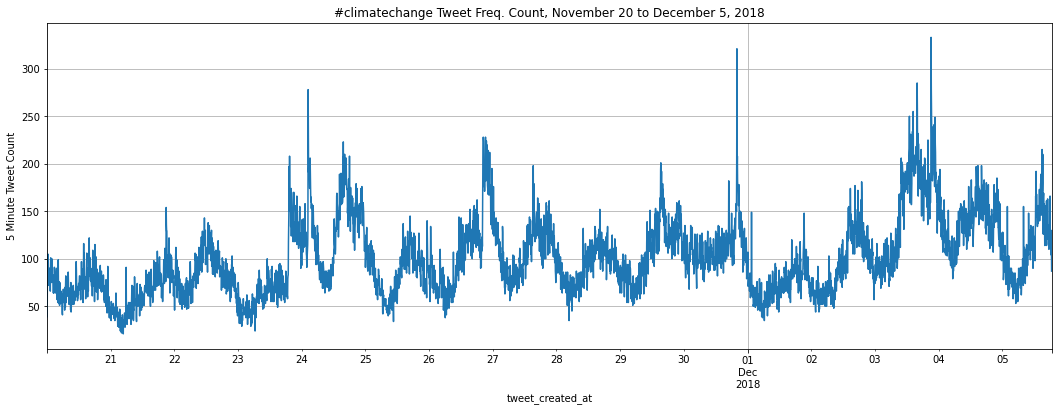

In [7]:
tweet_df_5min = tweet_df.groupby(pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute Tweet Count')
plt.title('#climatechange Tweet Freq. Count, November 20 to December 5, 2018')
plt.grid(True)

Podemos ver claramente um ciclo diário de atividade crescente e decrescente durante o período de duas semanas. Também podemos ver que a atividade pode variar significativamente de dia para dia, com picos acentuados de atividade ocorrendo ocasionalmente.

### Os 20 principais retuítes e os 20 principais retuitados
Estamos interessados nos tweets mais retuitados e nos usuários mais retuitados. Podemos usar o método <span style="font-family: 'Courier'">groupby</span> do Pandas novamente para contar o número de retweets para cada <span style="font-family: 'Courier'">retweet_id</span> e cada <span style="font-family: 'Courier'">retweet_user_screen_name</span>, mais uma vez usando o agregador <span style="font-family: 'Courier'">.size()</span>. Também podemos encadear uma chamada para classificar cada objeto Series resultante de grande para pequeno, permitindo-nos escolher facilmente os 20 principais em cada Series.

In [58]:
topretweets = tweet_df.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweets = topretweets[topretweets['retweet_id'] != 'None']
topretweeted = tweet_df.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()

### Traçando a linha do tempo dos 20 principais retuítes
Em seguida, usaremos o mesmo método <span style="font-family: 'Courier'">groupby</span> para obter as linhas do tempo dos retuítes associados aos 20 principais tweets mais retweetados, agrupados mais uma vez em compartimentos de 5 minutos. Isso deve nos dar uma ideia melhor da "vida de um tweet", ou seja, como um tweet é retweetado ao longo do tempo. No exemplo de código para este gráfico, mostramos como criar uma paleta de cores usando um python <span style="font-family: 'Courier'">dict</span> para que possamos definir facilmente uma cor personalizada para cada linha do tempo de tweet individual.

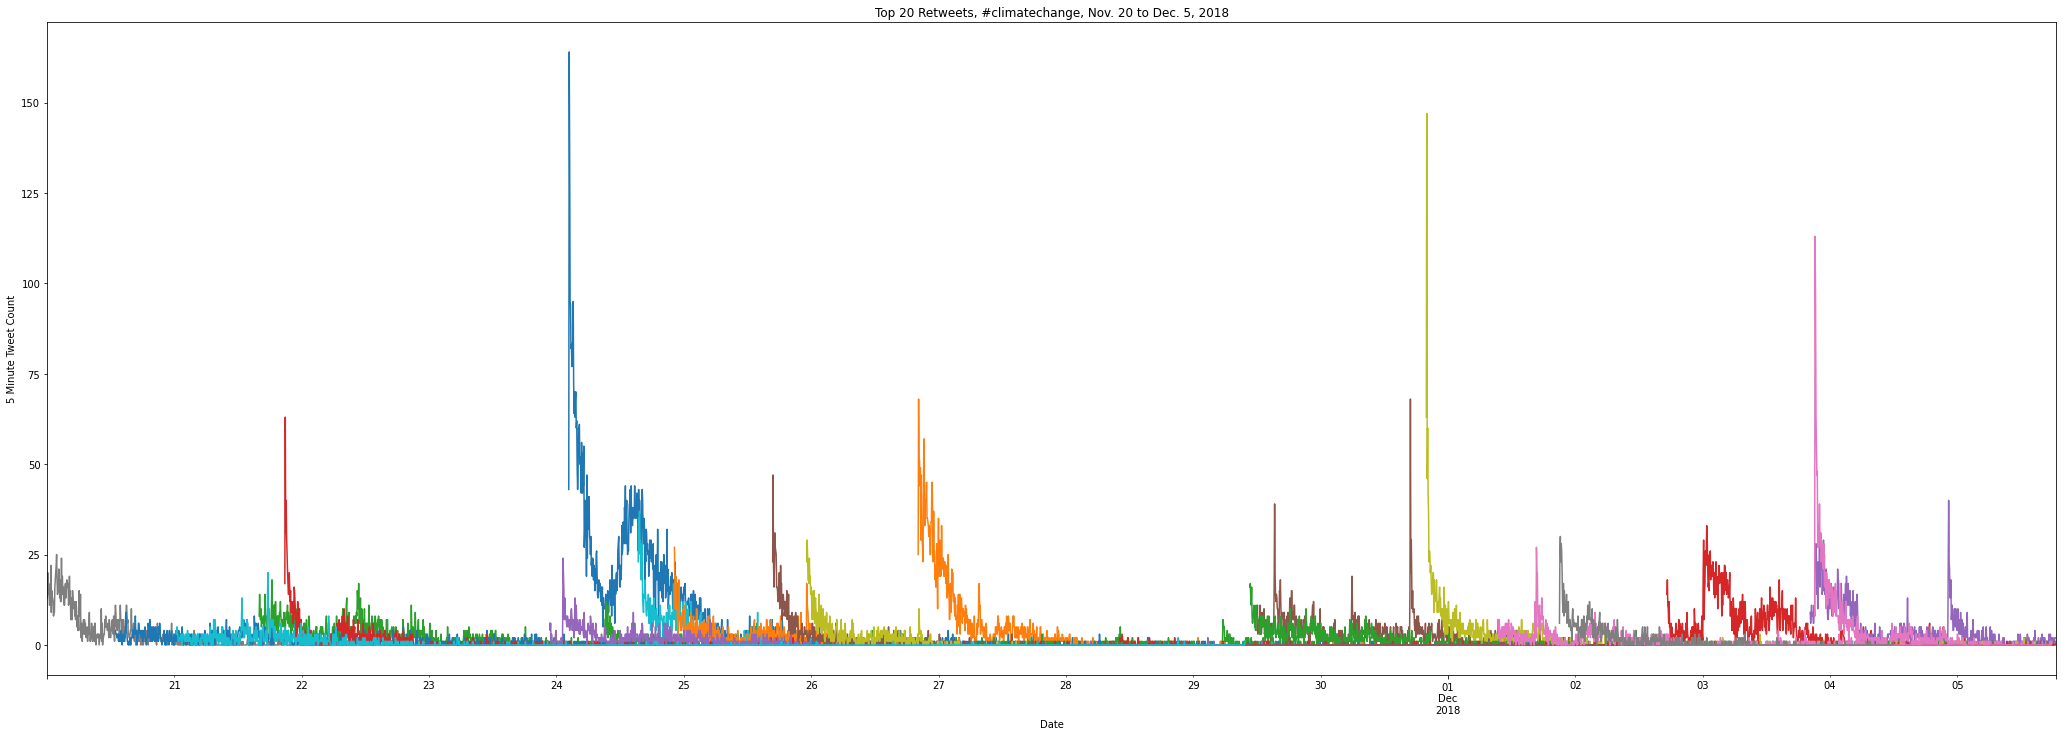

In [59]:
plt.figure(figsize=(36,12))
for top in range(0,20):
    tweetid = topretweets.iloc[top].retweet_id
    climatechange_top_retweets = tweet_df[tweet_df.retweet_id==tweetid]
    climatechange_top_retweets.groupby(\
        pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size().plot()

plt.xlabel('Date')
plt.ylabel('5 Minute Tweet Count')
plt.title('Top 20 Retweets, #climatechange, Nov. 20 to Dec. 5, 2018')
plt.savefig("climatechange_top20_retweet_timelines.png")

### Linha do tempo cumulativa de um único tweet
Neste exemplo, usaremos uma abordagem diferente para visualizar a "vida de um tweet". Nesta abordagem, não agruparemos os tweets em 'bins' de 5 minutos, mas sim plotaremos cada tweet em um gráfico de dispersão usando o timestamp do tweet para o eixo x e uma contagem incremental para cada tweet no eixo y. Os 20 principais retuítes no conjunto de dados <span style="font-family: 'Courier'">#climatechange</span> consistem em alguns milhares de tweets. Isso deve ser muito gerenciável para <span style="font-family: 'Courier'">matplotlib</span>. Veremos que, embora esse método ofereça insights adicionais sobre como um tweet é retuitado ao longo do tempo, também há limitações nesse método e o processo de revelar detalhes importantes pode exigir modificações adicionais no método de visualização.

Um exemplo do gráfico de dispersão resultante é mostrado abaixo:

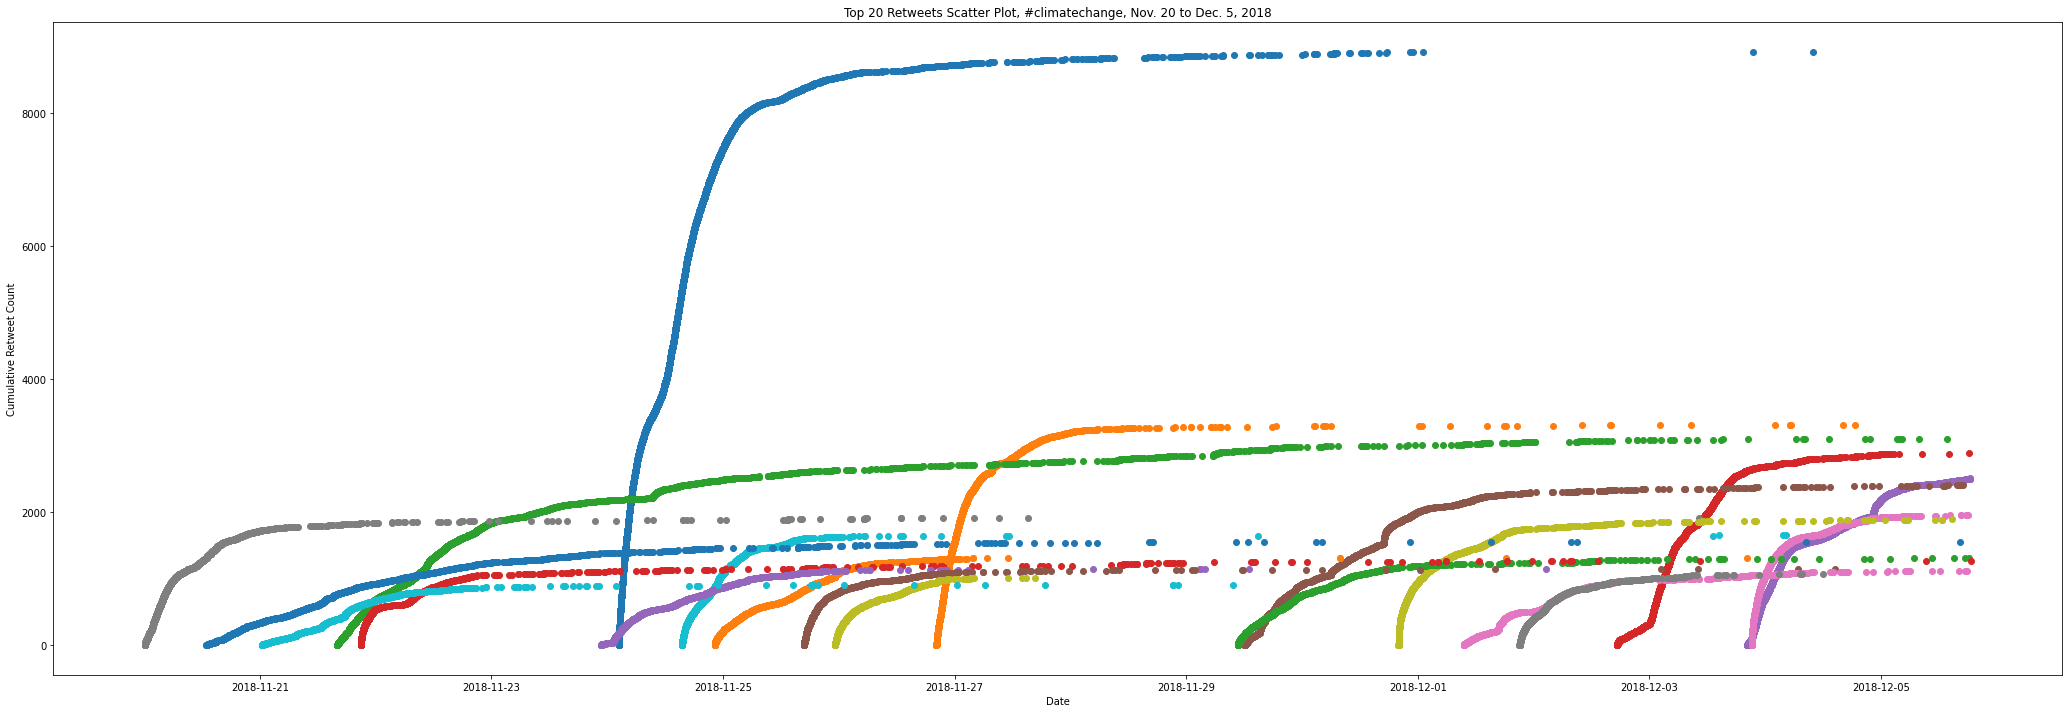

In [103]:
plt.figure(figsize=(36,12))
for top in range(0,20):
    climatechange_top_retweet = tweet_df[tweet_df.retweet_id==topretweets.iloc[top].retweet_id]
    x = climatechange_top_retweet.sort_values(by='tweet_created_at')['tweet_created_at']
    y = [i for i in range(x.shape[0])]
    plt.xlabel('Date')
    plt.ylabel('Cumulative Retweet Count')
    plt.title('Top 20 Retweets Scatter Plot, #climatechange, Nov. 20 to Dec. 5, 2018')
    plt.scatter(x, y)
plt.savefig("climatechange_top20_cumulative_retweet_scatter.png")
plt.show() 